In [137]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
from uncertainties import ufloat
from uncertainties.umath import *

def calculateTimeIntervall(filename, peaks):
    f = open(filename, "r")
    n=float(f.readlines()[6][16:21])
    steps=[]
    for i in range(len(peaks)-1):
        steps.append(peaks[i+1]-peaks[i])
    print(n)
    return ufloat((n*np.array(steps)).mean(), (n*np.array(steps)).std())



Please note that all of the DataFrames are just named df as it is easier to manipulate the code.
It is recommended to calculate the desired result in the block of code where it is.

C:\Users\andri\AppData\Local\Temp\ipykernel_12408\2268512786.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peaks=np.array(scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000))


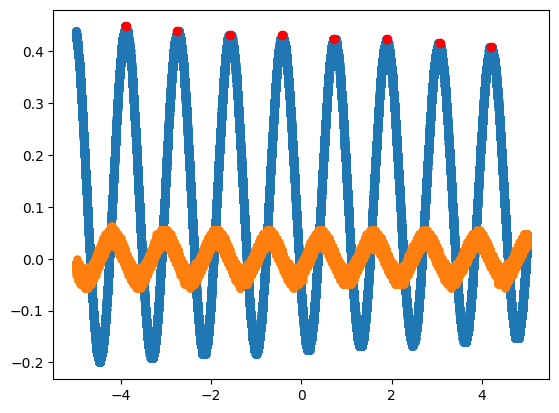

<class 'numpy.ndarray'>
8e-06
Period of the undamped Oscillator: 1.159+/-0.014


In [138]:
filename="T0000.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["TIME"], df["CH1"], linewidth=0.1)
plt.scatter(df["TIME"], df["CH2"], linewidth=0.1)
peaks=np.array(scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000))
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(type(peaks[0]))
res_period=calculateTimeIntervall(filename, peaks[0])
print("Period of the undamped Oscillator: " + str(res_period))

The following block of code was used to determmine which group of maximum values are a part of the maximum, it is not all that practical since we use more computer resources, for the calculation, for which we already have a simpler solution.

C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


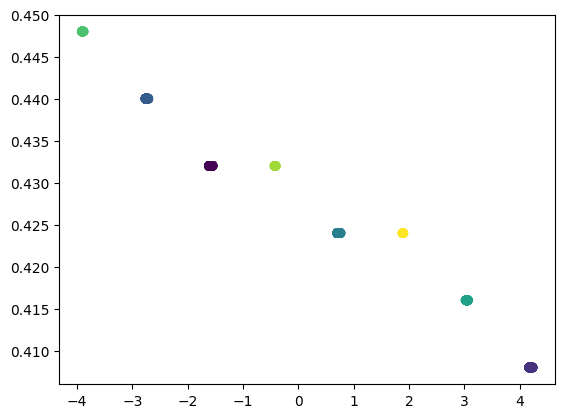

In [73]:
from sklearn.cluster import AgglomerativeClustering
x=df["TIME"][peaks[0]]
y=df["CH1"][peaks[0]]
data=list(zip(x, y))
hierarchial_cluster=AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
labels=hierarchial_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

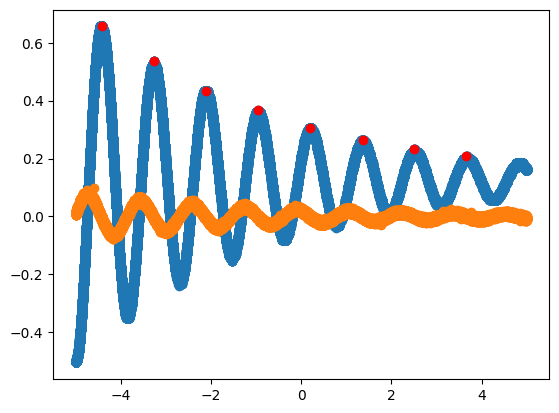

[  7358  21593  36114  50422  64925  79720  93713 108144]
8e-05
Period of the undamped Oscillator: 1.152+/-0.019


In [141]:
filename="T0001.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(peaks[0])
res_period=calculateTimeIntervall(filename, peaks[0])
print("Period of the undamped Oscillator: " + str(res_period))

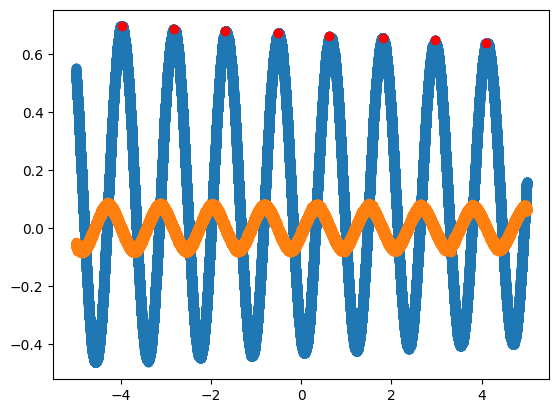

[ 12718  27127  41448  56052  70279  85092  99712 113760]
8e-05
Period of the undamped Oscillator: 1.155+/-0.019


In [142]:
filename="T0002.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(peaks[0])
res_period=calculateTimeIntervall(filename, peaks[0])
print("Period of the undamped Oscillator: " + str(res_period))